In [1]:
import numpy as np
import os
import multiprocessing as mul
import matplotlib.pyplot as plt
from numba import jit, njit, prange, set_num_threads, vectorize, guvectorize, cuda
from tqdm import tqdm
from core.signal_bag import *
from core.stacking_analysis import *
from core.req_arrays import *
import pickle
import scipy.stats as st
import scipy.interpolate as interp

read icdata
read uptdata
read eadata
read mspdata


In [2]:
comppickle_TS = []
for i in os.listdir('./comppickle/btsp3/'):
    with open('./comppickle/btsp3/'+i, 'rb') as f:
        comppickle_TS.append(pickle.load(f))
        
comppickle_TS = np.asfarray(comppickle_TS)

In [3]:
np.shape(comppickle_TS)

(10, 4, 1000)

In [4]:
phy3pickle_TS = []
for i in os.listdir('./phy3pickle/btsp3/'):
    with open('./phy3pickle/btsp3/'+i, 'rb') as f:
        phy3pickle_TS.append(pickle.load(f))

phy3pickle_TS = np.asfarray(phy3pickle_TS)

In [5]:
phy2pickle_TS = []
for i in os.listdir('./phy2pickle/btsp3/'):
    with open('./phy2pickle/btsp3/'+i, 'rb') as f:
        phy2pickle_TS.append(pickle.load(f))
        
phy2pickle_TS = np.asfarray(phy2pickle_TS)

In [6]:
phy3pickle_TS.shape

(10, 4, 1000)

In [7]:
gamma22 = []
for i in phy2pickle_TS:
    gamma22.append(max(i[1]))

for i in phy3pickle_TS:
    gamma22.append(max(i[1]))

for i in comppickle_TS:
    gamma22.append(max(i[1]))
    
gamma22 = np.asfarray(gamma22)


gamma253 = []
for i in phy2pickle_TS:
    gamma253.append(max(i[2]))
    
for i in phy3pickle_TS:
    gamma253.append(max(i[2]))
    
for i in comppickle_TS:
    gamma253.append(max(i[2]))
    
gamma253 = np.asfarray(gamma253)

gamma3 = []
for i in phy2pickle_TS:
    gamma3.append(max(i[3]))

for i in phy3pickle_TS:
    gamma3.append(max(i[3]))
    
for i in comppickle_TS:
    gamma3.append(max(i[3]))
    
gamma3 = np.asfarray(gamma3)


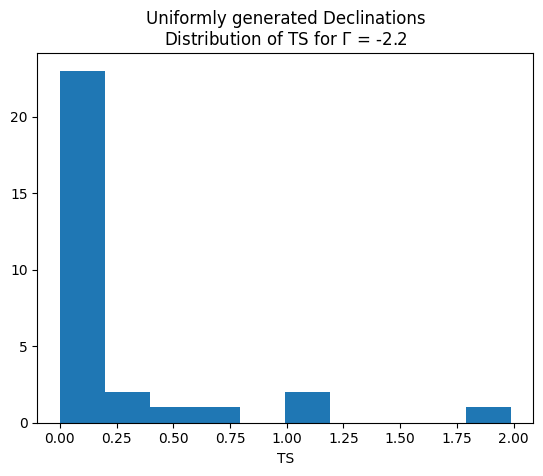

In [8]:
plt.hist(gamma22, label='-2.2')
plt.title('Uniformly generated Declinations\nDistribution of TS for $\u0393$ = -2.2')
plt.xlabel('TS')
plt.show()


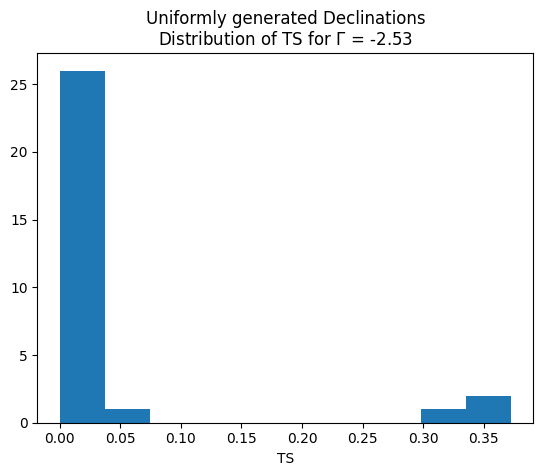

In [9]:
plt.hist(gamma253, label='-2.53')
plt.title('Uniformly generated Declinations\nDistribution of TS for $\u0393$ = -2.53')
plt.xlabel('TS')
plt.show()

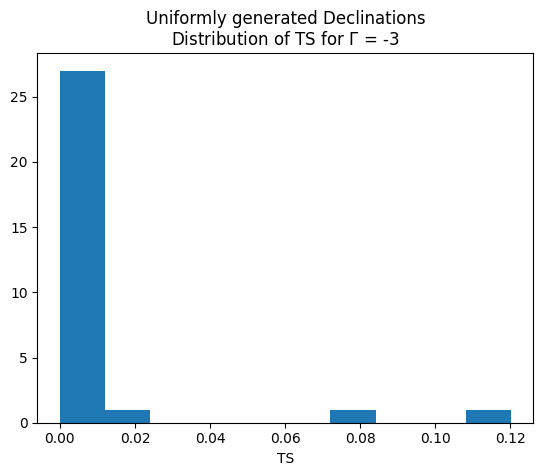

In [10]:
plt.hist(gamma3, label='-3')
plt.title('Uniformly generated Declinations\nDistribution of TS for $\u0393$ = -3')
plt.xlabel('TS')
plt.show()

In [11]:
bts4comp = []

for i in os.listdir('./comppickle/btsp4/'):
    with open('./comppickle/btsp4/'+i, 'rb') as f:
        bts4comp.append(pickle.load(f))
        
        
bts4comp = np.asfarray(bts4comp)

bts4comp.shape

bts4phy3 = []

for i in os.listdir('./phy3pickle/btsp4/'):
    with open('./phy3pickle/btsp4/'+i, 'rb') as f:
        bts4phy3.append(pickle.load(f))
        
bts4phy3 = np.asfarray(bts4phy3)

bts4phy3.shape

bts4phy2 = []

for i in os.listdir('./phy2pickle/btsp4/'):
    with open('./phy2pickle/btsp4/'+i, 'rb') as f:
        bts4phy2.append(pickle.load(f))
        
bts4phy2 = np.asfarray(bts4phy2)

bts4phy2.shape

(10, 4, 1000)

In [12]:
gamma22 = []
for i in bts4phy2:
    gamma22.append(max(i[1]))
    
for i in bts4phy3:
    gamma22.append(max(i[1]))
    
for i in bts4comp:
    gamma22.append(max(i[1]))
    
gamma22 = np.asfarray(gamma22)

gamma253 = []
for i in bts4phy2:
    gamma253.append(max(i[2]))
    
for i in bts4phy3:
    gamma253.append(max(i[2]))
    
for i in bts4comp:
    gamma253.append(max(i[2]))
    
gamma253 = np.asfarray(gamma253)

gamma3 = []
for i in bts4phy2:
    gamma3.append(max(i[3]))
    
for i in bts4phy3:
    gamma3.append(max(i[3]))
    
for i in bts4comp:
    gamma3.append(max(i[3]))
    
gamma3 = np.asfarray(gamma3)

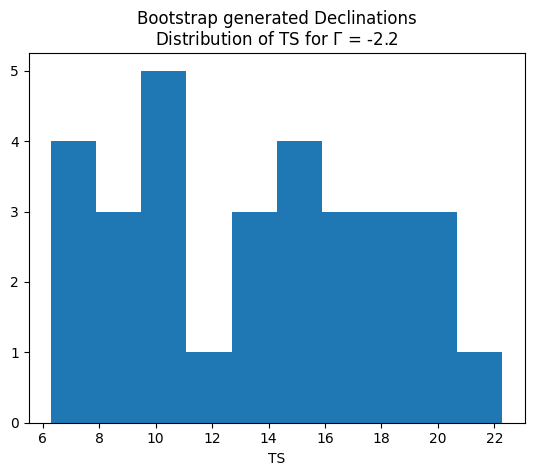

In [13]:
plt.hist(gamma22, label='-2.2')
plt.title('Bootstrap generated Declinations\nDistribution of TS for $\u0393$ = -2.2')
plt.xlabel('TS')
plt.show()

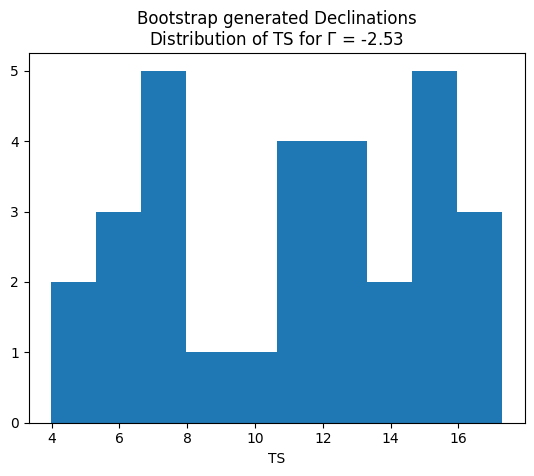

In [14]:
plt.hist(gamma253, label='-2.53')
plt.title('Bootstrap generated Declinations\nDistribution of TS for $\u0393$ = -2.53')
plt.xlabel('TS')
plt.show()

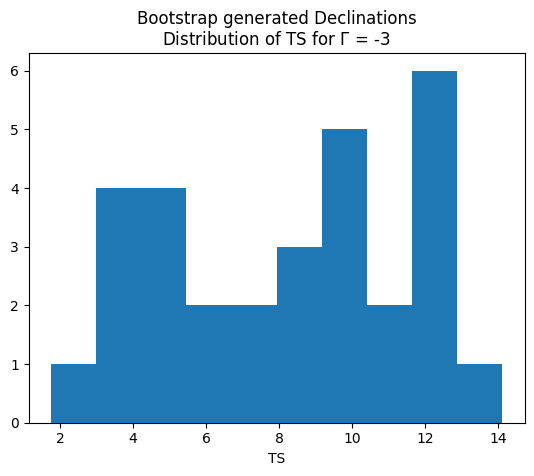

In [15]:
plt.hist(gamma3, label='-3')
plt.title('Bootstrap generated Declinations\nDistribution of TS for $\u0393$ = -3')
plt.xlabel('TS')
plt.show()

In [16]:
bts4_doff_comp = []
for i in os.listdir('./comppickle/btsp4_doff/'):
    with open('./comppickle/btsp4_doff/'+i, 'rb') as f:
        bts4_doff_comp.append(pickle.load(f))
        
bts4_doff_comp = np.asfarray(bts4_doff_comp)

bts4_doff_comp.shape

bts4_doff_phy3 = []
for i in os.listdir('./phy3pickle/btsp4_doff/'):
    with open('./phy3pickle/btsp4_doff/'+i, 'rb') as f:
        bts4_doff_phy3.append(pickle.load(f))
        
bts4_doff_phy3 = np.asfarray(bts4_doff_phy3)

bts4_doff_phy3.shape

bts4_doff_phy2 = []
for i in os.listdir('./phy2pickle/btsp4_doff/'):
    with open('./phy2pickle/btsp4_doff/'+i, 'rb') as f:
        bts4_doff_phy2.append(pickle.load(f))
        
bts4_doff_phy2 = np.asfarray(bts4_doff_phy2)

bts4_doff_phy2.shape

(10, 4, 1000)

In [17]:
gamma22 = []
for i in bts4_doff_phy2:
    gamma22.append(max(i[1]))
    
for i in bts4_doff_phy3:
    gamma22.append(max(i[1]))
    
for i in bts4_doff_comp:
    gamma22.append(max(i[1]))
    
gamma22 = np.asfarray(gamma22)

gamma253 = []
for i in bts4_doff_phy2:
    gamma253.append(max(i[2]))
    
for i in bts4_doff_phy3:
    gamma253.append(max(i[2]))
    
for i in bts4_doff_comp:
    gamma253.append(max(i[2]))
    
gamma253 = np.asfarray(gamma253)

gamma3 = []
for i in bts4_doff_phy2:
    gamma3.append(max(i[3]))
    
for i in bts4_doff_phy3:
    gamma3.append(max(i[3]))
    
for i in bts4_doff_comp:
    gamma3.append(max(i[3]))
    
gamma3 = np.asfarray(gamma3)

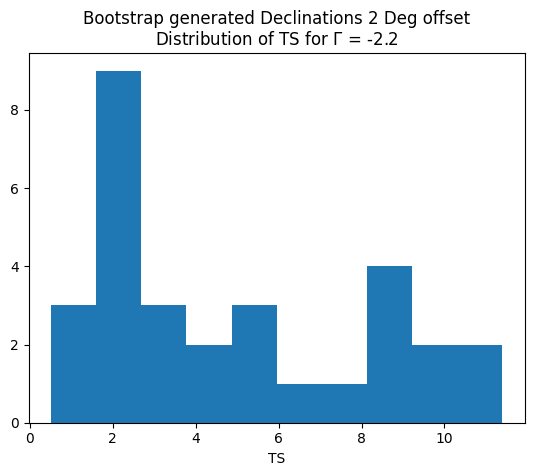

In [18]:
plt.hist(gamma22, label='-2.2')
plt.title('Bootstrap generated Declinations 2 Deg offset\nDistribution of TS for $\u0393$ = -2.2')
plt.xlabel('TS')
plt.show()


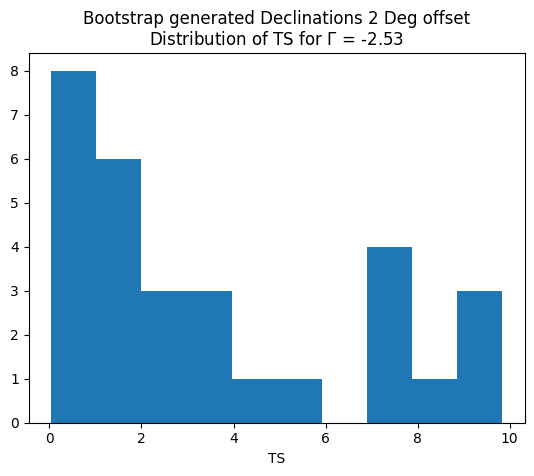

In [19]:
plt.hist(gamma253, label='-2.53')
plt.title('Bootstrap generated Declinations 2 Deg offset\nDistribution of TS for $\u0393$ = -2.53')
plt.xlabel('TS')
plt.show()


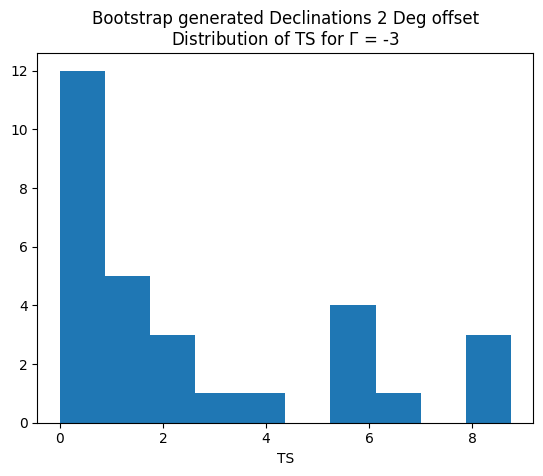

In [20]:
plt.hist(gamma3, label='-3')
plt.title('Bootstrap generated Declinations 2 Deg offset\nDistribution of TS for $\u0393$ = -3')
plt.xlabel('TS')
plt.show()

In [22]:
sg = []
for i in os.listdir('comppickle/node1_sg/'):
    with open('comppickle/node2_sg/'+i, 'rb') as f:
        sg.append(pickle.load(f))

for i in os.listdir('comppickle/node2_sg/'):
    with open('comppickle/node2_sg/'+i, 'rb') as f:
        sg.append(pickle.load(f))
        
        
sg = np.asfarray(sg)

In [24]:
gamma253 = []
for i in sg:
    # print(max(i[0]))
    gamma253.append(max(i[0]))

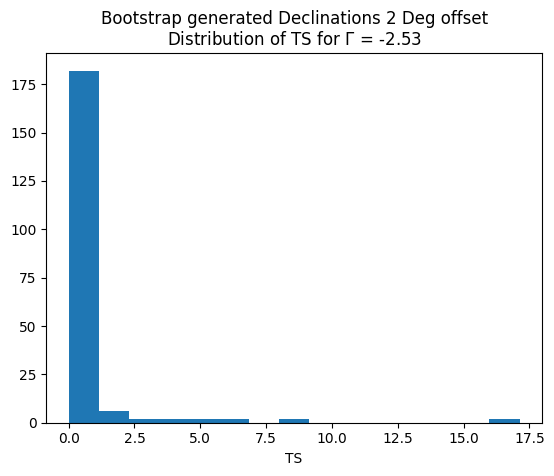

In [28]:
plt.hist(gamma253,bins=15, label='-2.53')
plt.title('Bootstrap generated Declinations 2 Deg offset\nDistribution of TS for $\u0393$ = -2.53')
plt.xlabel('TS')
plt.show()

In [29]:
np.histogram(gamma253, bins=15)

(array([182,   6,   2,   2,   2,   2,   0,   2,   0,   0,   0,   0,   0,
          0,   2]),
 array([-4.28228643e-07,  1.14172762e+00,  2.28345567e+00,  3.42518372e+00,
         4.56691178e+00,  5.70863983e+00,  6.85036788e+00,  7.99209593e+00,
         9.13382398e+00,  1.02755520e+01,  1.14172801e+01,  1.25590081e+01,
         1.37007362e+01,  1.48424642e+01,  1.59841923e+01,  1.71259203e+01]))

In [31]:
np.mean(gamma253)

0.5302663559693208

In [32]:
with open('pickle/all_TSS_10000000_bins_C_wt_all_psr_wmod1.pkl', 'rb') as f:
    all_TSS = pickle.load(f)
    

In [54]:
np.savetxt('g-2.txt', all_TSS[1][all_TSS[1] != np.nan])

In [59]:
np.nanargmax(all_TSS[1])

458

In [60]:
phio = np.logspace(-38, -20, 1000)

    

In [62]:
1e19 * phio[458]

1.787525525904232e-11

In [53]:
np.savetxt('phiog-2.txt',1e19 * phio)

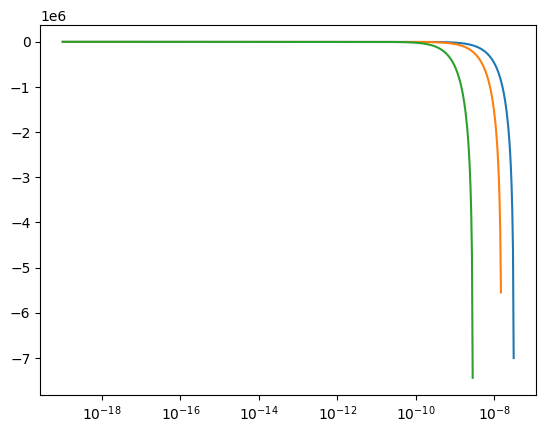

In [50]:
for i in all_TSS[1:]:
    plt.plot(1e19 * phio, i)
    
plt.xscale('log')
# plt.ylim(-220, 90 )
plt.show()